## Module Requirements 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import os.path 

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report

from sklearn.metrics import brier_score_loss 
from sklearn.metrics import auc 

import warnings
warnings.filterwarnings('ignore')

In [11]:
import sys
sys.path.append('../')
from src import utils, applyThreshold, calcMetrics, cnn_evaluate

## Metircs 

<img src="SkillMetrics.png" width="800" height="400">

## Trained Models Direction

In [4]:
trained_model_root_dir  = '../trained_model/'

## 24 Hr lead Time Prediction Evaluation 

### Category less than 1600m

In [52]:
trained_model_dir_241600 = os.path.join(trained_model_root_dir, "24hr/1600/")

In [53]:
tr_24_1600_ypred = pd.read_csv(trained_model_dir_241600 + 'VIS_Prob_TRAIN.csv')
tr_24_1600_ypred = tr_24_1600_ypred.to_numpy() 

tr_24_1600_ytrue = pd.read_csv(trained_model_dir_241600 + 'VIS_True_TRAIN.csv')
tr_24_1600_ytrue = tr_24_1600_ytrue['CAT']
tr_24_1600_ytrue = tr_24_1600_ytrue.to_numpy().ravel()

te_24_1600_ypred = pd.read_csv(trained_model_dir_241600 + 'VIS_Prob_TEST.csv')
te_24_1600_ypred = te_24_1600_ypred.to_numpy()

te_24_1600_ytrue = pd.read_csv(trained_model_dir_241600 + 'VIS_True_TEST.csv')
te_24_1600_ytrue = te_24_1600_ytrue['CAT']
te_24_1600_ytrue = te_24_1600_ytrue.to_numpy().ravel()

In [54]:
# calculating the optimal threshold based on training data plus all the metrics: 
optimal_threshold_24_1600, TrAcc241600, Res241600  = cnn_evaluate.skilled_metrics(tr_24_1600_ytrue, tr_24_1600_ypred, metric = 'HSS') 
# calculating the metrics for test dataset based on optimal threshold 
TeAcc241600 = cnn_evaluate.test_eval(te_24_1600_ytrue, te_24_1600_ypred, threshold = optimal_threshold_24_1600)

In [55]:
print("=============   24 hr prediction for <1600m category   ===============")

print("Hit/Miss cases: ")
print(f"       Hit    Miss    False Alarm   Correct rejected")
print(f"Train  {int(TrAcc241600[0])}      {int(TrAcc241600[1])}           {int(TrAcc241600[2])}              {int(TrAcc241600[3])}")
print(f"Test   {TeAcc241600[0]}      {TeAcc241600[1]}          {TeAcc241600[2]}              {TeAcc241600[3]}")
print()
print("Metrics:")
print(f"       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI")
print(f"Train  {TrAcc241600[4]:.2f}   {TrAcc241600[4]:.2f}  {TrAcc241600[6]:.2f}   {TrAcc241600[7]:.2f}   {TrAcc241600[8]:.2f}   {TrAcc241600[9]:.2f}   {TrAcc241600[10]:.2f}   {TrAcc241600[11]:.2f}  {TrAcc241600[12]:.2f}")
print(f"Test   {TeAcc241600[4]:.2f}   {TeAcc241600[5]:.2f}  {TeAcc241600[6]:.2f}   {TeAcc241600[7]:.2f}   {TeAcc241600[8]:.2f}   {TeAcc241600[9]:.2f}   {TeAcc241600[10]:.2f}   {TeAcc241600[11]:.2f}  {TeAcc241600[12]:.2f}")

=============   24 hr prediction for <1600m category   ===============
Hit/Miss cases: 
       Hit    Miss    False Alarm   Correct rejected
Train  97      6           10              5347
Test   37      30          35              2126

Metrics:
       POD     F    FAR    CSI    PSS     HSS   ORSS   CSS   SEDI
Train  0.94   0.94  0.09   0.86   0.94   0.92   1.00   0.91  0.99
Test   0.55   0.02  0.49   0.36   0.54   0.52   0.97   0.50  0.78


<Figure size 720x720 with 0 Axes>

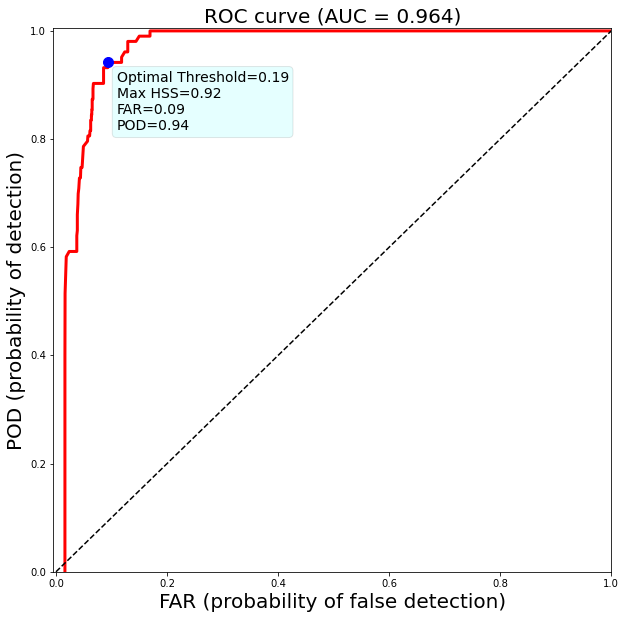

In [56]:
_ = cnn_evaluate.ROC_Curve_Plot(optimal_threshold, accuray_list, results)

### Category less than 3200m

In [57]:
trained_model_dir_243200 = os.path.join(trained_model_root_dir, "24hr/3200/")

In [ ]:
tr_24_3200_ypred = pd.read_csv(trained_model_dir_243200 + 'VIS_Prob_TRAIN.csv')
tr_24_3200_ypred = tr_24_3200_ypred.to_numpy() 

tr_24_3200_ytrue = pd.read_csv(trained_model_dir_243200 + 'VIS_True_TRAIN.csv')
tr_24_3200_ytrue = tr_24_3200_ytrue['CAT']
tr_24_3200_ytrue = tr_24_3200_ytrue.to_numpy().ravel()

te_24_3200_ypred = pd.read_csv(trained_model_dir_243200 + 'VIS_Prob_TEST.csv')
te_24_3200_ypred = te_24_3200_ypred.to_numpy()

te_24_3200_ytrue = pd.read_csv(trained_model_dir_243200 + 'VIS_True_TEST.csv')
te_24_3200_ytrue = te_24_3200_ytrue['CAT']
te_24_3200_ytrue = te_24_3200_ytrue.to_numpy().ravel()

***

# Monthly Evaluaitng 

In [ ]:
matplotlib.rc_file_defaults()
#ax1 = sns.set_style(style=None, rc=None )

fig, axs = plt.subplots(2, 2, figsize=(16,12))

#plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0.1, wspace = 0.1)
#plt.margins(0,0)

legend_elements = [Line2D([0], [0], marker='o', color='g', label='Hit',
                         markerfacecolor='g'),
                   Line2D([0], [0], marker='s', color='r', label='Miss',
                          markerfacecolor='r'),
                   Line2D([0], [0], marker='D', color='b', label='False Alarm',
                          markerfacecolor='b')
]

NA = patches.Patch(color='dimgray', label='All Cases')
EU = patches.Patch(color='Khaki', label='Fog Cases')


##########Plot 1 6hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 0])
g.set(ylim=(0, 25))
g.set(xlabel = None)

H6 = sns.scatterplot(data = AllData, x='Month', y='Hit6',  marker='o', s = 50, 
                     color='green', alpha=1, ax=axs[0, 0], zorder=10)
H6.set(xlabel = None)
M6 = sns.scatterplot(data = AllData, x='Month', y='Miss6', marker='s', s = 50, 
                     color='red',   alpha=1, ax=axs[0, 0], zorder=10)
M6.set(xlabel = None)
F6 = sns.scatterplot(data = AllData, x='Month', y='FA6',   marker='D', s = 50, 
                     color='blue',  alpha=1, ax=axs[0, 0], zorder=10)
F6.set(xlabel = None)


##########Plot 2 12hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[0, 1])
g.set(ylim=(0, 25))
H12 = sns.scatterplot(data = AllData, x='Month', y='Hit12',  marker='o', s = 50,  
                      color='green', alpha=1, ax=axs[0, 1], zorder=10)
M12 = sns.scatterplot(data = AllData, x='Month', y='Miss12', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[0, 1], zorder=10)
F12 = sns.scatterplot(data = AllData, x='Month', y='FA12',   marker='D',  s = 50,
                      color='blue',  alpha=1, ax=axs[0, 1], zorder=10)

##########Plot 3 24hr 
g = sns.barplot(data = AllData,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 0])
g.set(ylim=(0, 25))

H24 = sns.scatterplot(data = AllData, x='Month', y='Hit24',  marker='o', s = 50, 
                      color='green', alpha=1, ax=axs[1, 0], zorder=20)
M24 = sns.scatterplot(data = AllData, x='Month', y='Miss24', marker='s', s = 50, 
                      color='red',   alpha=1, ax=axs[1, 0], zorder=20)
F24 = sns.scatterplot(data = AllData, x='Month', y='FA24',   marker='D', s= 50,  
                      color='blue',  alpha=1, ax=axs[1, 0], zorder=20)

##########Plot 4 cases 
g1 = sns.barplot(data = NewData2,  x='Month', y='All Cases', color='dimgray', edgecolor='white', ax=axs[1, 1])
#g.set(ylim=(0, 25))
g2 = sns.barplot(data = NewData2,  x='Month', y='Fog Cases', color='Khaki', edgecolor='white', ax=axs[1, 1])

g1.set(ylim=(0, 270))
# Iterrating over the bars one-by-one 
for bar in g1.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    g1.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 6), 
                   textcoords='offset points') 


axs[0, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[0, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[0, 1].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 0].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 0].set_ylabel('Number of Fog Cases', fontname = 'Times New Roman', fontsize=16)

axs[1, 1].set_xlabel('Month', fontname = 'Times New Roman', fontsize=16)
axs[1, 1].set_ylabel('Number of All Cases vs Fog Cases', fontname = 'Times New Roman', fontsize=16)


plt.setp(axs[0, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
axs[0, 0].set_xlabel('')
plt.setp(axs[0, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 1].set_xlabel('')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[0, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 0].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 0].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

plt.setp(axs[1, 1].xaxis.get_majorticklabels(), fontname = 'Times New Roman', fontsize=16)
plt.setp(axs[1, 1].yaxis.get_majorticklabels(), fontname = 'Times New Roman')

axs[0, 0].legend(handles=legend_elements, loc = 'upper left')
axs[0, 1].legend(handles=legend_elements, loc = 'upper left')
axs[1, 0].legend(handles=legend_elements, loc = 'upper left')

axs[1, 1].legend(handles=[NA,EU], loc='upper right')


axs[0, 0].set_title('FogNet Monthly Performance, 6Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[0, 1].set_title('FogNet Monthly Performance, 12Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 0].set_title('FogNet Monthly Performance, 24Hr Prediction', fontname = 'Times New Roman', fontsize=18)
axs[1, 1].set_title('Number of Cases vs Fog Cases for Independent Data', fontname = 'Times New Roman', fontsize=18)

filename = 'output2.png'
plt.savefig(filename, dpi = 300) 